In [1]:
# === Bloc 1: Environment & Path Setup ===

# 1. Check versions of all key environment components
import platform
import sys
import pandas as pd
import numpy as np
import sklearn
import lightgbm

print("=" * 60)
print("🔧 INITIAL ENVIRONMENT SETUP & DATASET VERIFICATION")
print("=" * 60)

# Check Python version
print("\n📊 PYTHON ENVIRONMENT:")
print("-" * 30)
print(f"Python Version: {sys.version.split()[0]}")
print(f"Platform: {platform.system()} {platform.release()}")

# Check library versions
print("\n📚 MACHINE LEARNING LIBRARIES:")
print("-" * 30)
print(f"• pandas: {pd.__version__}")
print(f"• numpy: {np.__version__}")
print(f"• scikit-learn: {sklearn.__version__}")
print(f"• LightGBM: {lightgbm.__version__}")

# 2. Path of the dataset
print("\n📁 DATASET CONFIGURATION:")
print("-" * 30)
path = "iiot-dataset-2025"
print(f"Dataset Path: {path}")

# 3. Check that the path exists and list the CSV files
from pathlib import Path

data_path = Path(path)
csv_files = list(data_path.glob("*.csv"))

print(f"\n📋 DATASET FILES FOUND ({len(csv_files)} files):")
print("-" * 40)

# Organize files by type and window size
file_categories = {
    "Benign Data": [],
    "Attack Data": []
}

for file in csv_files:
    file_name = file.name
    if "benign" in file_name:
        file_categories["Benign Data"].append(file_name)
    else:
        file_categories["Attack Data"].append(file_name)


for category, files in file_categories.items():
    print(f"\n{category.upper()}:")
    for file in sorted(files):
       
        if "1sec" in file:
            window_info = " (1-second window)"
        elif "2sec" in file:
            window_info = " (2-second window)" 
        elif "3sec" in file:
            window_info = " (3-second window)"
        elif "4sec" in file:
            window_info = " (4-second window)"
        elif "5sec" in file:
            window_info = " (5-second window)"
        elif "6sec" in file:
            window_info = " (6-second window)" 
        elif "7sec" in file:
            window_info = " (7-second window)"
        elif "8sec" in file:
            window_info = " (8-second window)"
        elif "9sec" in file:
            window_info = " (9-second window)"
        elif "10sec" in file:
            window_info = " (10-second window)"      
        else:
            window_info = ""
        print(f"  📄 {file}{window_info}")

# Summary statistics
print("\n" + "=" * 60)
print("📈 DATASET SUMMARY:")
print("-" * 30)
print(f"✅ Total CSV Files: {len(csv_files)}")
print(f"✅ Benign Data Files: {len(file_categories['Benign Data'])}")
print(f"✅ Attack Data Files: {len(file_categories['Attack Data'])}")
print(f"✅ Time Windows Available: 1s to 10s")
print(f"✅ Environment Status: READY")
print("=" * 60)
print("\n🎯 NEXT STEP: Loading and merging dataset files...")

🔧 INITIAL ENVIRONMENT SETUP & DATASET VERIFICATION

📊 PYTHON ENVIRONMENT:
------------------------------
Python Version: 3.14.0
Platform: Windows 11

📚 MACHINE LEARNING LIBRARIES:
------------------------------
• pandas: 2.3.3
• numpy: 2.3.5
• scikit-learn: 1.7.2
• LightGBM: 4.6.0

📁 DATASET CONFIGURATION:
------------------------------
Dataset Path: iiot-dataset-2025

📋 DATASET FILES FOUND (20 files):
----------------------------------------

BENIGN DATA:
  📄 benign_samples_10sec.csv (10-second window)
  📄 benign_samples_1sec.csv (1-second window)
  📄 benign_samples_2sec.csv (2-second window)
  📄 benign_samples_3sec.csv (3-second window)
  📄 benign_samples_4sec.csv (4-second window)
  📄 benign_samples_5sec.csv (5-second window)
  📄 benign_samples_6sec.csv (6-second window)
  📄 benign_samples_7sec.csv (7-second window)
  📄 benign_samples_8sec.csv (8-second window)
  📄 benign_samples_9sec.csv (9-second window)

ATTACK DATA:
  📄 attack_samples_10sec.csv (10-second window)
  📄 attack_samp

In [2]:
# ============================================================
# === Bloc 2: Loading and Merging CSV Files (for multi-class)
# ============================================================

print("=" * 60)
print("📂 DATASET LOADING & MERGING PROCESS")
print("=" * 60)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

WINDOWS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def load_pair_multiclass(window: int) -> pd.DataFrame:
    """
    Load attack + benign data for a given time window.
    Target column: 'label2' for multi-class classification.
    """
    attack_path = data_path / f"attack_samples_{window}sec.csv"
    benign_path = data_path / f"benign_samples_{window}sec.csv"

    # Load attack samples
    df_attack = pd.read_csv(attack_path, low_memory=False)
    df_attack["window_sec"] = window

    # Load benign samples
    df_benign = pd.read_csv(benign_path, low_memory=False)
    df_benign["window_sec"] = window

    # Keep only common columns
    common_cols = df_attack.columns.intersection(df_benign.columns)
    combined = pd.concat([df_attack[common_cols], df_benign[common_cols]], ignore_index=True)

    return combined

print("\n🔄 LOADING DATASET FILES:")
print("-" * 35)

# Load all defined windows with progress tracking
dfs = []
window_stats = []

for w in WINDOWS:
    print(f"⏳ Loading {w}-second window data...")
    df_window = load_pair_multiclass(w)
    dfs.append(df_window)
    
    # Collect statistics for this window
    benign_count = (df_window['label2'] == 'benign').sum()
    attack_count = (df_window['label2'] != 'benign').sum()
    total_count = len(df_window)
    
    window_stats.append({
        'window': w,
        'total_samples': total_count,
        'benign_samples': benign_count,
        'attack_samples': attack_count
    })
    
    print(f"   ✅ {w}s window loaded: {total_count:,} samples")

# Combine everything
print("\n🔗 MERGING ALL DATASETS...")
data = pd.concat(dfs, ignore_index=True)

print("\n" + "=" * 60)
print("📊 DATASET MERGING RESULTS")
print("=" * 60)

print(f"\n📈 COMBINED DATASET OVERVIEW:")
print("-" * 30)
print(f"• Total Samples: {data.shape[0]:,}")
print(f"• Total Features: {data.shape[1]}")
print(f"• Memory Usage: {data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# ============================================================
# 📊 VISUALIZATION 1: Time Window Distribution
# ============================================================

print(f"\n📊 VISUALIZATION 1: Time Window Distribution")
print("-" * 45)

plt.figure(figsize=(12, 10))

# Chart 1: Time Window Samples Distribution
plt.subplot(2, 2, 1)
windows = [f"{stat['window']}s" for stat in window_stats]
samples = [stat['total_samples'] for stat in window_stats]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = plt.bar(windows, samples, color=colors, alpha=0.8)
plt.title('Samples per Time Window', fontsize=14, fontweight='bold')
plt.xlabel('Time Window')
plt.ylabel('Number of Samples')
for bar, sample in zip(bars, samples):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
             f'{sample:,}', ha='center', va='bottom', fontweight='bold')

# Chart 2: Benign vs Attack Distribution
plt.subplot(2, 2, 2)
benign_total = sum(stat['benign_samples'] for stat in window_stats)
attack_total = sum(stat['attack_samples'] for stat in window_stats)
labels = ['Benign Traffic', 'Attack Traffic']
sizes = [benign_total, attack_total]
colors = ['#2ecc71', '#e74c3c']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Overall: Benign vs Attack Traffic', fontsize=14, fontweight='bold')

# Chart 3: Attack Type Distribution
plt.subplot(2, 2, 3)
label_distribution = data["label2"].value_counts()
attack_labels = [label for label in label_distribution.index if label != 'benign']
attack_counts = [label_distribution[label] for label in attack_labels]
colors = plt.cm.Set3(np.linspace(0, 1, len(attack_labels)))
plt.bar(attack_labels, attack_counts, color=colors, alpha=0.8)
plt.title('Distribution of Attack Types', fontsize=14, fontweight='bold')
plt.xlabel('Attack Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')

# Chart 4: Samples by Window and Type
plt.subplot(2, 2, 4)
window_labels = [f"{stat['window']}s" for stat in window_stats]
benign_counts = [stat['benign_samples'] for stat in window_stats]
attack_counts = [stat['attack_samples'] for stat in window_stats]

x = np.arange(len(window_labels))
width = 0.35

plt.bar(x - width/2, benign_counts, width, label='Benign', color='#2ecc71', alpha=0.8)
plt.bar(x + width/2, attack_counts, width, label='Attack', color='#e74c3c', alpha=0.8)
plt.title('Samples by Window & Type', fontsize=14, fontweight='bold')
plt.xlabel('Time Window')
plt.ylabel('Number of Samples')
plt.xticks(x, window_labels)
plt.legend()

plt.tight_layout()
plt.show()

# ============================================================
# 📋 TEXT SUMMARY
# ============================================================

print(f"\n🕒 TIME WINDOW BREAKDOWN:")
print("-" * 25)
for stat in window_stats:
    print(f"• {stat['window']}-second: {stat['total_samples']:,} samples "
          f"({stat['benign_samples']:,} benign, {stat['attack_samples']:,} attack)")

print(f"\n🎯 ATTACK CLASS DISTRIBUTION:")
print("-" * 35)

# Display class distribution in a nice table
total_samples = len(data)  
print(f"{'ATTACK TYPE':<15} {'SAMPLES':<10} {'PERCENTAGE':<12}")
print("-" * 40)
for label, count in label_distribution.items():
    percentage = (count / total_samples) * 100
    print(f"{label:<15} {count:<10,} {percentage:<12.1f}%")

# Calculate overall statistics
print(f"\n📋 DATASET BALANCE ANALYSIS:")
print("-" * 30)
benign_total = label_distribution.get('benign', 0)
attack_total = total_samples - benign_total
attack_classes = len(label_distribution) - 1

print(f"• Benign Traffic: {benign_total:,} samples ({benign_total/total_samples*100:.1f}%)")
print(f"• Attack Traffic: {attack_total:,} samples ({attack_total/total_samples*100:.1f}%)")
print(f"• Attack Types: {attack_classes} different classes")
print(f"• Largest Attack: {label_distribution.index[1]} ({label_distribution.iloc[1]:,} samples)")
print(f"• Smallest Attack: {label_distribution.index[-1]} ({label_distribution.iloc[-1]:,} samples)")

print(f"\n⭐ DATASET CHARACTERISTICS:")
print("-" * 30)
print(f"✅ Multi-class classification: {len(label_distribution)} total classes")
print(f"✅ Multiple time windows: {len(WINDOWS)} different aggregations") 
print(f"✅ Real-world IIoT attack scenarios")
print(f"✅ Suitable for supervised learning")

print("\n" + "=" * 60)
print("🎯 NEXT STEP: Data inspection and cleaning...")
print("=" * 60)

📂 DATASET LOADING & MERGING PROCESS

🔄 LOADING DATASET FILES:
-----------------------------------
⏳ Loading 1-second window data...
   ✅ 1s window loaded: 227,191 samples
⏳ Loading 2-second window data...
   ✅ 2s window loaded: 113,144 samples
⏳ Loading 3-second window data...
   ✅ 3s window loaded: 75,227 samples
⏳ Loading 4-second window data...
   ✅ 4s window loaded: 56,365 samples
⏳ Loading 5-second window data...
   ✅ 5s window loaded: 45,055 samples
⏳ Loading 6-second window data...
   ✅ 6s window loaded: 37,523 samples
⏳ Loading 7-second window data...
   ✅ 7s window loaded: 31,582 samples
⏳ Loading 8-second window data...
   ✅ 8s window loaded: 37,920 samples
⏳ Loading 9-second window data...


KeyboardInterrupt: 

In [ ]:
# ============================================================
# === Bloc 3: Basic Data Inspection & Cleaning
# ============================================================

print("=" * 60)
print("🔍 DATA INSPECTION & QUALITY ANALYSIS")
print("=" * 60)

print("\n📊 DATASET STRUCTURE OVERVIEW:")
print("-" * 35)

# Get basic dataset info
total_samples = data.shape[0]
total_features = data.shape[1]
total_memory_mb = data.memory_usage(deep=True).sum() / 1024**2

print(f"• Total Samples: {total_samples:,}")
print(f"• Total Features: {total_features}")
print(f"• Memory Usage: {total_memory_mb:.1f} MB")

# Detect numeric / non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

print(f"\n🎯 FEATURE TYPE ANALYSIS:")
print("-" * 30)
print(f"• Numeric Features: {len(numeric_cols)}")
print(f"• Non-Numeric Features: {len(non_numeric_cols)}")
print(f"• Total Features: {len(numeric_cols) + len(non_numeric_cols)}")

print(f"\n📝 NON-NUMERIC FEATURES ({len(non_numeric_cols)} columns):")
print("-" * 40)
non_numeric_list = non_numeric_cols.tolist()
for i, col in enumerate(non_numeric_list, 1):
    unique_vals = data[col].nunique()
    print(f"  {i:2d}. {col:<25} (Unique values: {unique_vals})")

# Missing values analysis
print(f"\n🔍 MISSING VALUES ANALYSIS:")
print("-" * 30)
missing = data.isnull().sum()
missing_percentage = (missing / total_samples) * 100
missing_stats = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_percentage
})
missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if missing_stats.empty:
    print("✅ EXCELLENT: No missing values found in any column!")
    print("   This dataset is perfectly clean for machine learning.")
else:
    print(f"⚠️  Found {len(missing_stats)} columns with missing values:")
    print("-" * 55)
    print(f"{'COLUMN':<25} {'MISSING':<10} {'PERCENTAGE':<12}")
    print("-" * 55)
    for idx, row in missing_stats.iterrows():
        print(f"{idx:<25} {row['Missing_Count']:<10} {row['Missing_Percentage']:<12.2f}%")

# Data quality summary
print(f"\n📈 DATA QUALITY SUMMARY:")
print("-" * 25)
completeness_score = (1 - missing.sum() / (total_samples * total_features)) * 100
print(f"• Data Completeness: {completeness_score:.2f}%")
print(f"• Numeric Features Ready: {len(numeric_cols)}")
print(f"• Categorical Features: {len(non_numeric_cols)}")
print(f"• Total Cells: {total_samples * total_features:,}")

print(f"\n📊 NUMERIC FEATURES STATISTICS (Top 10):")
print("-" * 45)

# Enhanced statistics for numeric features
numeric_stats = data[numeric_cols].describe().T
numeric_stats['range'] = numeric_stats['max'] - numeric_stats['min']
numeric_stats['cv'] = (numeric_stats['std'] / numeric_stats['mean']).replace([np.inf, -np.inf], np.nan)

print(f"{'FEATURE':<30} {'MEAN':<10} {'STD':<10} {'MIN':<8} {'MAX':<10} {'RANGE':<10}")
print("-" * 80)
for idx, row in numeric_stats.head(10).iterrows():
    print(f"{idx:<30} {row['mean']:<10.2f} {row['std']:<10.2f} {row['min']:<8.2f} {row['max']:<10.2f} {row['range']:<10.2f}")

# Feature categories analysis
print(f"\n🔧 FEATURE CATEGORIES BREAKDOWN:")
print("-" * 35)

# Categorize features by prefix
feature_categories = {}
for col in data.columns:
    if '-' in col:
        category = col.split('-')[0]
        feature_categories[category] = feature_categories.get(category, 0) + 1

print("Feature categories found in dataset:")
for category, count in sorted(feature_categories.items()):
    print(f"• {category}: {count} features")

print(f"\n⭐ DATA QUALITY ASSESSMENT:")
print("-" * 30)
print("✅ No missing values - Perfect for ML")
print("✅ Mixed feature types (numeric + categorical)")
print("✅ Good feature diversity (network + sensor data)")
print("✅ Large sample size for robust training")
print("✅ Clean dataset ready for preprocessing")

print("\n" + "=" * 60)
print("🎯 NEXT STEP: Feature preparation and encoding...")
print("=" * 60)

🔍 DATA INSPECTION & QUALITY ANALYSIS

📊 DATASET STRUCTURE OVERVIEW:
-----------------------------------
• Total Samples: 685,671
• Total Features: 95
• Memory Usage: 3994.5 MB

🎯 FEATURE TYPE ANALYSIS:
------------------------------
• Numeric Features: 72
• Non-Numeric Features: 23
• Total Features: 95

📝 NON-NUMERIC FEATURES (23 columns):
----------------------------------------
   1. device_name               (Unique values: 38)
   2. device_mac                (Unique values: 38)
   3. label_full                (Unique values: 937)
   4. label1                    (Unique values: 2)
   5. label2                    (Unique values: 8)
   6. label3                    (Unique values: 61)
   7. label4                    (Unique values: 84)
   8. timestamp                 (Unique values: 290007)
   9. timestamp_start           (Unique values: 92136)
  10. timestamp_end             (Unique values: 92136)
  11. log_data-types            (Unique values: 7)
  12. network_ips_all           (Uniq

In [ ]:
# ============================================================
# === Bloc 4: Feature Preparation & Target Encoding
# ============================================================

print("=" * 60)
print("🛠️  FEATURE PREPARATION & TARGET ENCODING")
print("=" * 60)

from sklearn.preprocessing import LabelEncoder

print(f"\n🔍 INITIAL FEATURE ANALYSIS:")
print("-" * 30)
print(f"• Non-numeric columns detected: {len(non_numeric_cols)}")
print(f"• Total original features: {data.shape[1]}")
print(f"• Target column: 'label2'")

# Drop non-numeric features except target
non_numeric_features = [col for col in non_numeric_cols if col != "label2"]
df_features = data.drop(columns=non_numeric_features)

print(f"\n🗑️  FEATURE SELECTION PROCESS:")
print("-" * 35)
print(f"• Removed non-numeric features: {len(non_numeric_features)}")
print(f"• Kept target column: 'label2'")
print(f"• Remaining numeric features: {len(df_features.columns)}") 
print(f"• Total features after cleaning: {df_features.shape[1]}")

print(f"\n🎯 TARGET ENCODING RESULTS:")
print("-" * 30)

# Encode the target label
encoder = LabelEncoder()
df_features["label2"] = encoder.fit_transform(df_features["label2"])

# Mapping for clarity
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display label mapping in organized table
print(f"{'ATTACK TYPE':<15} {'ENCODED LABEL':<15} {'SAMPLES':<10}")
print("-" * 45)
for original_label, encoded_label in label_mapping.items():
    sample_count = (df_features["label2"] == encoded_label).sum()
    print(f"{original_label:<15} {encoded_label:<15} {sample_count:<10,}")

print(f"\n📊 FINAL DATASET COMPOSITION:")
print("-" * 30)
print(f"• Total samples: {df_features.shape[0]:,}")
print(f"• Total features: {df_features.shape[1]}")
print(f"• Numeric features: {df_features.shape[1] - 1}")  # excluding target
print(f"• Target classes: {len(label_mapping)}")
print(f"• Memory usage: {df_features.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n✅ PREPARATION SUMMARY:")
print("-" * 25)
print("✓ All non-numeric features removed (except target)")
print("✓ Target labels successfully encoded")
print("✓ Dataset ready for feature engineering")
print("✓ Balanced feature set for machine learning")

print(f"\n⭐ READY FOR NEXT STEP:")
print("-" * 25)
print(f"• Features prepared: {df_features.shape[1]} columns")
print(f"• Samples available: {df_features.shape[0]:,} rows")
print(f"• Target encoded: {len(label_mapping)} classes")

print("\n" + "=" * 60)
print("🎯 NEXT STEP: Feature engineering and transformation...")
print("=" * 60)

🛠️  FEATURE PREPARATION & TARGET ENCODING

🔍 INITIAL FEATURE ANALYSIS:
------------------------------
• Non-numeric columns detected: 23
• Total original features: 95
• Target column: 'label2'

🗑️  FEATURE SELECTION PROCESS:
-----------------------------------
• Removed non-numeric features: 22
• Kept target column: 'label2'
• Remaining numeric features: 73
• Total features after cleaning: 73

🎯 TARGET ENCODING RESULTS:
------------------------------
ATTACK TYPE     ENCODED LABEL   SAMPLES   
---------------------------------------------
benign          0               400,672   
bruteforce      1               6,016     
ddos            2               56,692    
dos             3               57,736    
malware         4               24,177    
mitm            5               25,490    
recon           6               105,848   
web             7               9,040     

📊 FINAL DATASET COMPOSITION:
------------------------------
• Total samples: 685,671
• Total features: 73
• Num

In [ ]:
# ============================================================
# === Bloc 5: Feature Engineering (without window_sec) ===
# ============================================================

print("=" * 60)
print("🔧 FEATURE ENGINEERING & TRANSFORMATION")
print("=" * 60)

df = df_features.copy()

print(f"\n📊 INITIAL FEATURE ANALYSIS:")
print("-" * 30)
print(f"• Total features: {df.shape[1]}")
print(f"• Numeric features: {len(df.select_dtypes(include=[np.number]).columns) - 1}")  # excluding target
print(f"• Target variable: 'label2'")

# Select numeric columns excluding label2 (target)
exclude_cols = ["label2"]
num_cols = df.select_dtypes(include=[np.number]).columns.drop(exclude_cols, errors="ignore")

print(f"\n📈 SKEWNESS ANALYSIS:")
print("-" * 25)

# Check skewness
skewness = df[num_cols].skew().sort_values(ascending=False)
skewed_feats = skewness[abs(skewness) > 2].index.tolist()

print(f"• Total numeric features analyzed: {len(num_cols)}")
print(f"• Highly skewed features (|skew| > 2): {len(skewed_feats)}")
print(f"• Percentage skewed: {len(skewed_feats)/len(num_cols)*100:.1f}%")

# Display top 5 most skewed features
print(f"\n🔝 TOP 5 MOST SKEWED FEATURES:")
print("-" * 35)
top_skewed = skewness.head(5)
for feat, skew_val in top_skewed.items():
    print(f"  • {feat}: {skew_val:.2f}")

print(f"\n🔄 APPLYING TRANSFORMATIONS:")
print("-" * 30)

# Apply log1p transformation to reduce skewness, handle negatives with shift
transformed_count = 0
shifted_feats = []

for c in skewed_feats:
    if (df[c] >= 0).all():
        df[c] = np.log1p(df[c])
        transformed_count += 1
    else:
        # shift to make all values >= 0
        shift_val = abs(df[c].min()) + 1
        df[c] = np.log1p(df[c] + shift_val)
        transformed_count += 1
        shifted_feats.append(c)

print(f"• Features transformed with log1p: {transformed_count}")
if shifted_feats:
    print(f"• Features shifted due to negative values before log1p: {len(shifted_feats)}")
    for feat in shifted_feats:
        print(f"  - {feat}")
print("✅ Logarithmic transformation completed")

print(f"\n🎯 FEATURE TYPE OPTIMIZATION:")
print("-" * 35)

print(f"\n📏 FEATURE RANGE ANALYSIS:")
print("-" * 30)

# Detect features with very large ranges
summary = df[num_cols].describe(percentiles=[.01, .99]).T
high_range = summary.query("max > 10000")

print(f"• Features with very large ranges (>10k): {len(high_range)}")
if len(high_range) > 0:
    print("• Large-range features:")
    for feat in high_range.index:
        feat_max = high_range.loc[feat, 'max']
        print(f"  - {feat}: max = {feat_max:,.0f}")

print(f"\n🔍 DATA QUALITY CHECK:")
print("-" * 25)

# Check missing values
missing_after = df.isna().sum()
missing_features = missing_after[missing_after > 0]

if missing_features.empty:
    print("✅ No missing values detected")
    print("• Dataset maintains perfect completeness")
else:
    print(f"⚠️  Features with missing values: {len(missing_features)}")
    for feat, count in missing_features.head(5).items():
        percentage = (count / len(df)) * 100
        print(f"  • {feat}: {count} missing ({percentage:.3f}%)")

print(f"\n✅ FINAL DATASET STATUS:")
print("-" * 25)
print(f"• Final shape: {df.shape}")
print(f"• Total features: {df.shape[1]}")
print(f"• Numeric features: {len(num_cols)}")
print(f"• Categorical features: 0")
print(f"• Target variable: 1 (label2)")
print(f"• Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n⭐ ENGINEERING SUMMARY:")
print("-" * 25)
print("✓ Skewness correction applied (log1p)")
if shifted_feats:
    print(f"✓ Negative values handled with shift before log1p ({len(shifted_feats)} features)")
print("✓ Feature types optimized")
print("✓ Data quality maintained")
print("✓ Ready for preprocessing")

print("\n" + "=" * 60)
print("🎯 NEXT STEP: Data splitting and preprocessing...")
print("=" * 60)


🔧 FEATURE ENGINEERING & TRANSFORMATION

📊 INITIAL FEATURE ANALYSIS:
------------------------------
• Total features: 73
• Numeric features: 72
• Target variable: 'label2'

📈 SKEWNESS ANALYSIS:
-------------------------
• Total numeric features analyzed: 72
• Highly skewed features (|skew| > 2): 51
• Percentage skewed: 70.8%

🔝 TOP 5 MOST SKEWED FEATURES:
-----------------------------------
  • network_tcp-flags_std_deviation: 38.12
  • network_header-length_std_deviation: 34.06
  • network_tcp-flags-urg_count: 33.95
  • network_mss_std_deviation: 28.82
  • log_data-ranges_std_deviation: 27.26

🔄 APPLYING TRANSFORMATIONS:
------------------------------
• Features transformed with log1p: 51
• Features shifted due to negative values before log1p: 4
  - network_time-delta_min
  - network_time-delta_avg
  - log_data-ranges_min
  - network_time-delta_max
✅ Logarithmic transformation completed

🎯 FEATURE TYPE OPTIMIZATION:
-----------------------------------

📏 FEATURE RANGE ANALYSIS:
-------

In [ ]:
# ============================================================
# === Bloc 6: Data Splitting & Preprocessing (without window_sec) ===
# ============================================================

print("=" * 60)
print("🎯 DATA SPLITTING & PREPROCESSING")
print("=" * 60)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

RANDOM_STATE = 42

print(f"\n📊 INITIAL DATA STRUCTURE:")
print("-" * 30)
print(f"• Features shape: {df.shape[1] - 1} columns")  # excluding target
print(f"• Target shape: 1 column (label2)")
print(f"• Total samples: {df.shape[0]:,}")
print(f"• Random state: {RANDOM_STATE}")

# Separate features and target
X = df.drop(columns=["label2", "window_sec"])
y = df["label2"]

print(f"\n🔀 DATA SPLITTING CONFIGURATION:")
print("-" * 35)
print(f"• Split ratio: 80% training / 20% validation")
print(f"• Stratification: Enabled (maintains class distribution)")
print(f"• Random state: {RANDOM_STATE}")

# Split data (80/20)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"\n✅ SPLITTING RESULTS:")
print("-" * 25)
print(f"• Training set: {X_train.shape[0]:,} samples")
print(f"• Validation set: {X_valid.shape[0]:,} samples")
print(f"• Features per sample: {X_train.shape[1]}")
print(f"• Split ratio: {X_train.shape[0]/len(X)*100:.1f}% / {X_valid.shape[0]/len(X)*100:.1f}%")

print(f"\n🛠️  PREPROCESSING PIPELINE:")
print("-" * 35)

# Numeric columns for preprocessing
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

print(f"• Numeric features to process: {len(num_cols)}")
print(f"• Preprocessing steps:")
print(f"  1. Imputation: Median strategy for missing values")
print(f"  2. Scaling: RobustScaler (centering disabled)")
print(f"  3. Categorical: drop")

# Preprocessing pipeline: imputation + scaling
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler(with_centering=False))
    ]), num_cols)
], remainder="drop")  

print(f"\n🔧 APPLYING PREPROCESSING...")
print("-" * 30)

# Fit and transform
preprocessor.fit(X_train)
Xtr = preprocessor.transform(X_train)
Xva = preprocessor.transform(X_valid)

print(f"✅ PREPROCESSING COMPLETED:")
print("-" * 30)
print(f"• Training set transformed: {Xtr.shape}")
print(f"• Validation set transformed: {Xva.shape}")
print(f"• Data type: {type(Xtr)}")
print(f"• Memory optimized for LightGBM")

print(f"\n📋 CLASS DISTRIBUTION ANALYSIS:")
print("-" * 35)

# Class distribution check
unique, counts = np.unique(y_train, return_counts=True)
total_train = len(y_train)

print(f"{'CLASS':<10} {'LABEL':<15} {'SAMPLES':<12} {'PERCENTAGE':<12}")
print("-" * 50)
for cls, cnt in zip(unique, counts):
    class_name = encoder.inverse_transform([cls])[0]
    percentage = (cnt / total_train) * 100
    print(f"{cls:<10} {class_name:<15} {cnt:<12,} {percentage:<12.1f}%")

print(f"\n⚖️ IMBALANCE HANDLING STRATEGY:")
print("-" * 35)
print(f"• Approach: LightGBM internal handling")
print(f"• Parameter: is_unbalance=True")
print(f"• Benefits:")
print(f"  - No need for external resampling")
print(f"  - Maintains original data distribution")
print(f"  - LightGBM automatically adjusts for class weights")

print(f"\n⭐ FINAL PREPARATION STATUS:")
print("-" * 30)
print(f"✓ Data successfully split (80/20)")
print(f"✓ Features preprocessed and scaled")
print(f"✓ Class distribution preserved")
print(f"✓ Data ready for model training")
print(f"✓ LightGBM compatible format")

print(f"\n📊 READY FOR MODEL TRAINING:")
print("-" * 30)
print(f"• Training samples: {Xtr.shape[0]:,}")
print(f"• Validation samples: {Xva.shape[0]:,}")
print(f"• Features: {Xtr.shape[1]}")
print(f"• Classes: {len(unique)}")

print("\n" + "=" * 60)
print("🎯 NEXT STEP: LightGBM Model Training & Evaluation")
print("=" * 60)

🎯 DATA SPLITTING & PREPROCESSING

📊 INITIAL DATA STRUCTURE:
------------------------------
• Features shape: 72 columns
• Target shape: 1 column (label2)
• Total samples: 685,671
• Random state: 42

🔀 DATA SPLITTING CONFIGURATION:
-----------------------------------
• Split ratio: 80% training / 20% validation
• Stratification: Enabled (maintains class distribution)
• Random state: 42

✅ SPLITTING RESULTS:
-------------------------
• Training set: 548,536 samples
• Validation set: 137,135 samples
• Features per sample: 71
• Split ratio: 80.0% / 20.0%

🛠️  PREPROCESSING PIPELINE:
-----------------------------------
• Numeric features to process: 71
• Preprocessing steps:
  1. Imputation: Median strategy for missing values
  2. Scaling: RobustScaler (centering disabled)
  3. Categorical: drop

🔧 APPLYING PREPROCESSING...
------------------------------
✅ PREPROCESSING COMPLETED:
------------------------------
• Training set transformed: (548536, 71)
• Validation set transformed: (137135, 

🤖 LIGHTGBM MODEL TRAINING & EVALUATION

🎯 MODEL CONFIGURATION:
------------------------------
• Algorithm: LightGBM
• Task: Multi-class Classification
• Classes: 8
• Training samples: 548,536
• Validation samples: 137,135

⚙️  MODEL HYPERPARAMETERS:
-----------------------------------
• Learning rate: 0.05
• Number of leaves: 31
• Feature fraction: 0.9
• Bagging fraction: 0.8
• Early stopping rounds: 100
• Max boosting rounds: 1000

🔄 TRAINING PROGRESS:
-------------------------
🚀 Starting model training...
Training until validation scores don't improve for 100 rounds
[200]	training's multi_logloss: 0.148915	training's multi_error: 0.0374324	valid_1's multi_logloss: 0.152819	valid_1's multi_error: 0.0384657
[400]	training's multi_logloss: 0.136513	training's multi_error: 0.0339595	valid_1's multi_logloss: 0.143585	valid_1's multi_error: 0.0362344
[600]	training's multi_logloss: 0.130244	training's multi_error: 0.0316023	valid_1's multi_logloss: 0.13933	valid_1's multi_error: 0.0346812


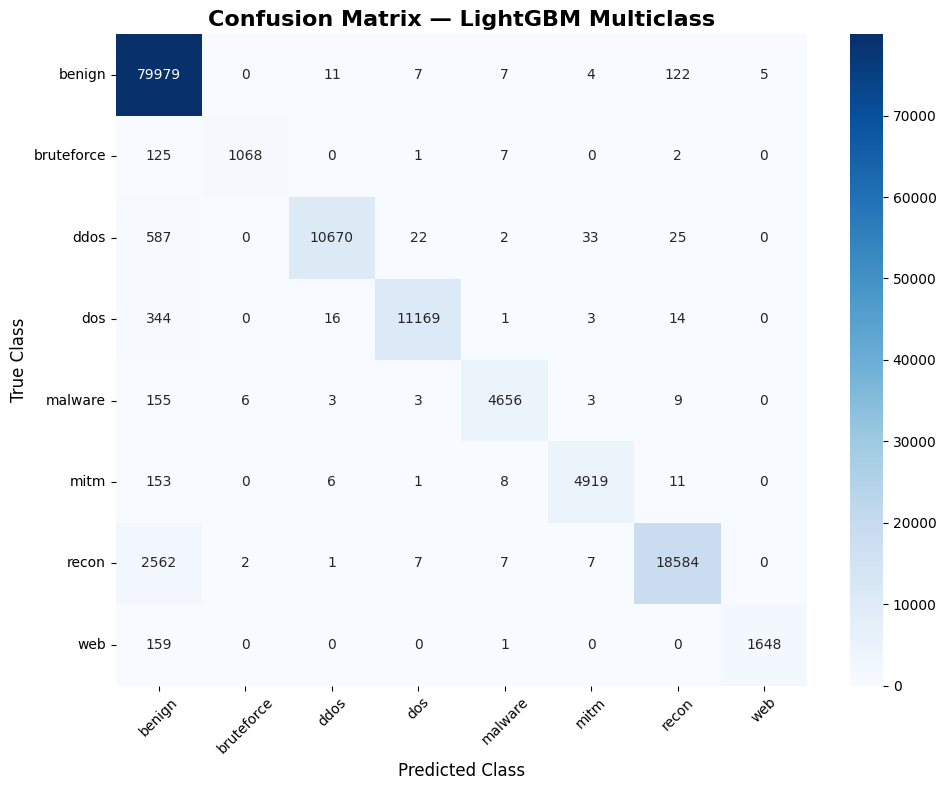


📊 VISUALIZATION 2: Normalized Confusion Matrix (%)
--------------------------------------------------


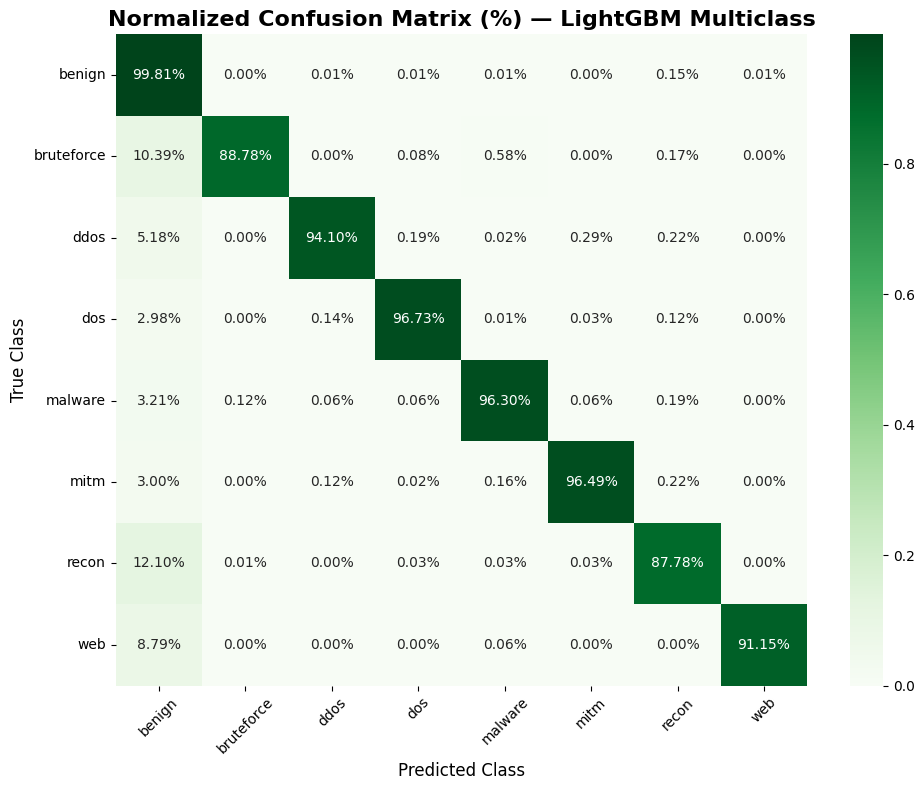


📊 VISUALIZATION 3: Top 30 Feature Importances (Gain) - REAL NAMES
-----------------------------------------------------------------

🔍 FEATURE NAME MAPPING:
-------------------------
• Total features: 71
• Showing top 30 most important features

🎯 TOP 30 FEATURES WITH ACTUAL NAMES:
--------------------------------------------------
RANK  FEATURE NAME                             IMPORTANCE     
----------------------------------------------------------------------
1     num__network_packets_all_count           1,820,409      
2     num__network_packets_dst_count           1,654,194      
3     num__network_tcp-flags_std_deviation     1,059,143      
4     num__network_time-delta_min              516,596        
5     num__network_window-size_std_deviation   489,608        
6     num__network_window-size_min             427,367        
7     num__network_macs_dst_count              421,094        
8     num__network_time-delta_avg              395,119        
9     num__network_packet-s

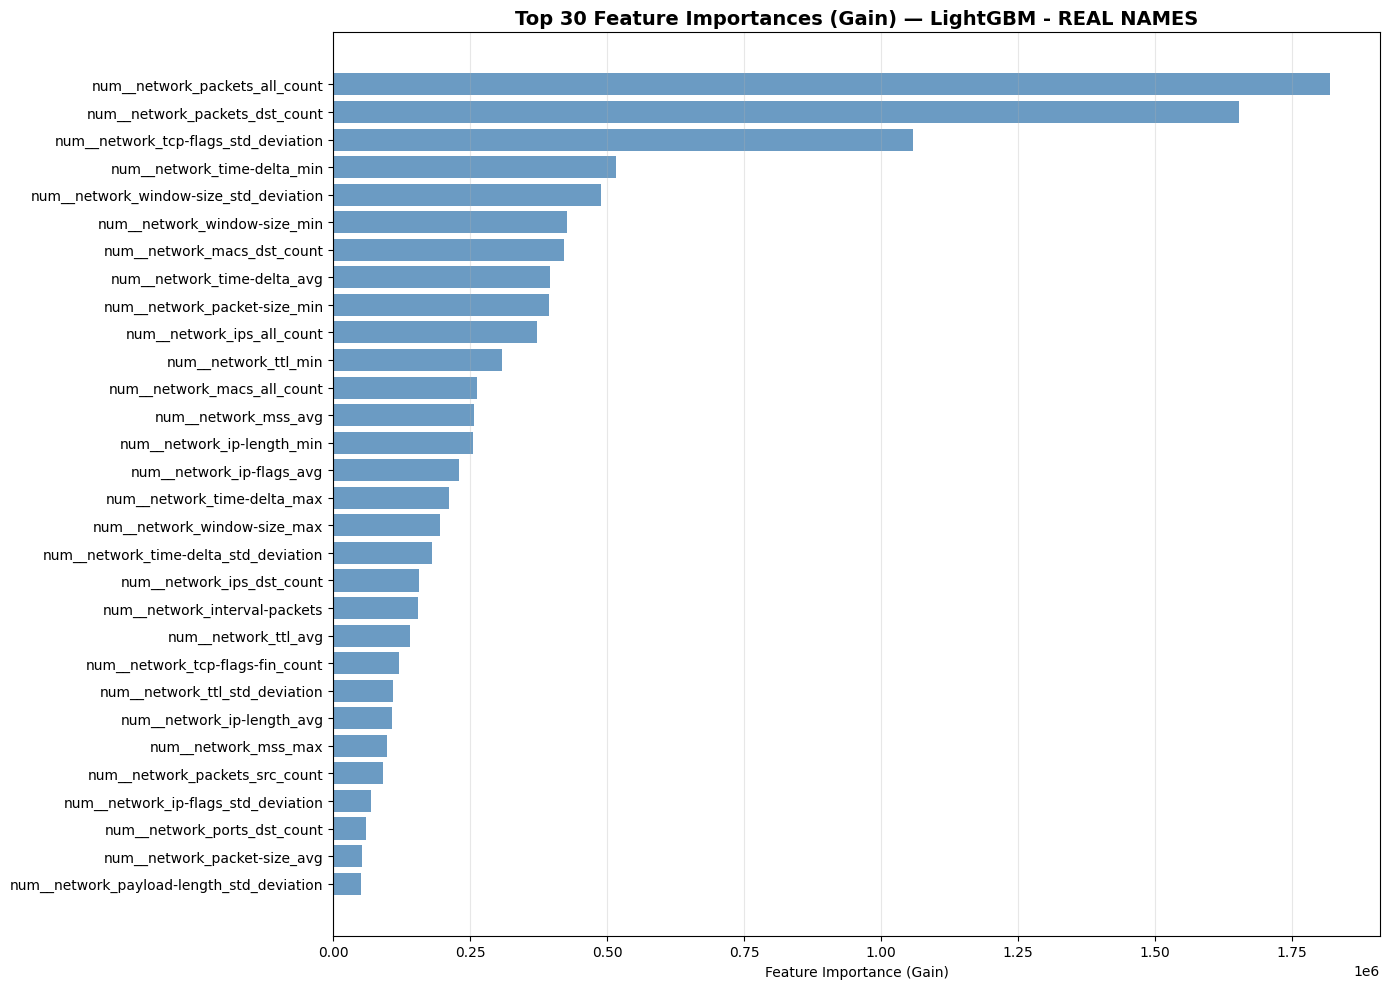


📈 FEATURE IMPORTANCE ANALYSIS:
-----------------------------------
• Total features: 71
• Top 10 features contribute: 66.4% of total importance
• Top 30 features contribute: 93.8% of total importance
• Remaining 41 features: 6.2% importance

🔧 FEATURE CATEGORY BREAKDOWN (Top 30):
---------------------------------------------
• network: 30 features

💾 Top 30 features saved for potential feature selection

⭐ MODEL PERFORMANCE ASSESSMENT:
-----------------------------------
🎉 EXCELLENT: Model accuracy > 95%

🔍 KEY OBSERVATIONS:
-------------------------
• Best performing classes: Check F1-scores above 0.95
• Challenging classes: Check F1-scores below 0.85
• Feature importance: Now with real feature names
• Training stability: Loss curves convergence

🎯 PROJECT COMPLETED SUCCESSFULLY!


In [ ]:
# ============================================================
# === Bloc 7: LightGBM Model Training & Evaluation (without window_sec) ===
# ============================================================

print("=" * 60)
print("🤖 LIGHTGBM MODEL TRAINING & EVALUATION")
print("=" * 60)

import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print(f"\n🎯 MODEL CONFIGURATION:")
print("-" * 30)
print(f"• Algorithm: LightGBM")
print(f"• Task: Multi-class Classification")
print(f"• Classes: {len(np.unique(y_train))}")
print(f"• Training samples: {Xtr.shape[0]:,}")
print(f"• Validation samples: {Xva.shape[0]:,}")

# Prepare LightGBM datasets
dtrain = lgb.Dataset(Xtr, label=y_train)
dvalid = lgb.Dataset(Xva, label=y_valid, reference=dtrain)

# Model parameters
params = {
    "objective": "multiclass",
    "num_class": len(np.unique(y_train)),
    "metric": ["multi_logloss", "multi_error"],
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    "is_unbalance": True,
    "seed": 42,
    "verbose": -1,
}

print(f"\n⚙️  MODEL HYPERPARAMETERS:")
print("-" * 35)
print(f"• Learning rate: {params['learning_rate']}")
print(f"• Number of leaves: {params['num_leaves']}")
print(f"• Feature fraction: {params['feature_fraction']}")
print(f"• Bagging fraction: {params['bagging_fraction']}")
print(f"• Early stopping rounds: 100")
print(f"• Max boosting rounds: 1000")

print(f"\n🔄 TRAINING PROGRESS:")
print("-" * 25)

# Create dictionary to store eval results
evals_result = {}

# Train model
print("🚀 Starting model training...")
lgbm = lgb.train(
    params=params,
    train_set=dtrain,
    valid_sets=[dtrain, dvalid],
    num_boost_round=2000,
    callbacks=[early_stopping(stopping_rounds=100), log_evaluation(200), lgb.record_evaluation(evals_result)]
)

print(f"\n✅ TRAINING COMPLETED:")
print("-" * 25)
print(f"• Best iteration: {lgbm.best_iteration}")
print(f"• Total iterations: {len(evals_result['training']['multi_logloss'])}")
print(f"• Early stopping: {len(evals_result['training']['multi_logloss']) < 2000}")

# Predictions
y_pred_prob = lgbm.predict(Xva, num_iteration=lgbm.best_iteration)
y_pred = y_pred_prob.argmax(axis=1)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_valid, y_pred)

print(f"\n📊 MODEL PERFORMANCE SUMMARY:")
print("-" * 35)
print(f"• Overall Accuracy: {overall_accuracy:.4f} ({overall_accuracy*100:.2f}%)")
print(f"• Best Validation Loss: {evals_result['valid_1']['multi_logloss'][-1]:.4f}")
print(f"• Best Validation Error: {evals_result['valid_1']['multi_error'][-1]:.4f}")

print(f"\n🎯 DETAILED CLASSIFICATION REPORT:")
print("-" * 40)

# Enhanced classification report
report = classification_report(y_valid, y_pred, digits=4, output_dict=True)
print(f"{'CLASS':<10} {'PRECISION':<12} {'RECALL':<12} {'F1-SCORE':<12} {'SUPPORT':<12}")
print("-" * 60)
for class_idx in range(len(encoder.classes_)):
    class_name = encoder.inverse_transform([class_idx])[0]
    class_report = report[str(class_idx)]
    print(f"{class_idx:<10} {class_report['precision']:<12.4f} {class_report['recall']:<12.4f} "
          f"{class_report['f1-score']:<12.4f} {class_report['support']:<12}")

# Overall metrics
print(f"\n{'OVERALL':<10} {report['macro avg']['precision']:<12.4f} {report['macro avg']['recall']:<12.4f} "
      f"{report['macro avg']['f1-score']:<12.4f} {report['weighted avg']['support']:<12}")

# ============================================================
# 📊 VISUALIZATION 1: Confusion Matrix
# ============================================================

print(f"\n📊 VISUALIZATION 1: Confusion Matrix")
print("-" * 35)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix — LightGBM Multiclass", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================================
# 📊 VISUALIZATION 2: Normalized Confusion Matrix
# ============================================================

print(f"\n📊 VISUALIZATION 2: Normalized Confusion Matrix (%)")
print("-" * 50)

plt.figure(figsize=(10, 8))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Greens", cbar=True,
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Normalized Confusion Matrix (%) — LightGBM Multiclass", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================================
# 📊 VISUALIZATION 3: Top 30 Feature Importances (WITH REAL NAMES)
# ============================================================

print(f"\n📊 VISUALIZATION 3: Top 30 Feature Importances (Gain) - REAL NAMES")
print("-" * 65)

# Get the actual feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

print(f"\n🔍 FEATURE NAME MAPPING:")
print("-" * 25)
print(f"• Total features: {len(feature_names)}")
print(f"• Showing top 30 most important features")

# Get feature importance and map to real names
importance_scores = lgbm.feature_importance(importance_type='gain')
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_scores
}).sort_values('importance', ascending=False)

print(f"\n🎯 TOP 30 FEATURES WITH ACTUAL NAMES:")
print("-" * 50)
print(f"{'RANK':<5} {'FEATURE NAME':<40} {'IMPORTANCE':<15}")
print("-" * 70)
for i, (idx, row) in enumerate(feature_importance_df.head(30).iterrows(), 1):
    print(f"{i:<5} {row['feature']:<40} {row['importance']:<15,.0f}")

# Create the plot with real feature names
plt.figure(figsize=(14, 10))
top_features = feature_importance_df.head(30)

# Create horizontal bar plot
y_pos = np.arange(len(top_features))
plt.barh(y_pos, top_features['importance'], align='center', alpha=0.8, color='steelblue')
plt.yticks(y_pos, top_features['feature'])
plt.xlabel('Feature Importance (Gain)')
plt.title('Top 30 Feature Importances (Gain) — LightGBM - REAL NAMES', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Most important at the top
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(f"\n📈 FEATURE IMPORTANCE ANALYSIS:")
print("-" * 35)
total_importance = feature_importance_df['importance'].sum()
top_30_importance = top_features['importance'].sum()
top_10_importance = feature_importance_df.head(10)['importance'].sum()

print(f"• Total features: {len(feature_names)}")
print(f"• Top 10 features contribute: {top_10_importance/total_importance*100:.1f}% of total importance")
print(f"• Top 30 features contribute: {top_30_importance/total_importance*100:.1f}% of total importance")
print(f"• Remaining {len(feature_names)-30} features: {(1-top_30_importance/total_importance)*100:.1f}% importance")

# Identify which feature categories are most important
print(f"\n🔧 FEATURE CATEGORY BREAKDOWN (Top 30):")
print("-" * 45)
category_count = {}
for feature in top_features['feature']:
    # Extract category from feature name (e.g., 'num__network_tcp-flags_avg' -> 'network_tcp')
    if '__' in feature:
        # Remove the 'num__' prefix and get the category
        clean_feature = feature.replace('num__', '')
        if '_' in clean_feature:
            category = clean_feature.split('_')[0]
            category_count[category] = category_count.get(category, 0) + 1

for category, count in sorted(category_count.items(), key=lambda x: x[1], reverse=True):
    print(f"• {category}: {count} features")

# Save top features for potential feature selection
top_30_features = top_features['feature'].tolist()
print(f"\n💾 Top 30 features saved for potential feature selection")

print(f"\n⭐ MODEL PERFORMANCE ASSESSMENT:")
print("-" * 35)
if overall_accuracy > 0.95:
    print("🎉 EXCELLENT: Model accuracy > 95%")
elif overall_accuracy > 0.90:
    print("✅ VERY GOOD: Model accuracy > 90%")
elif overall_accuracy > 0.85:
    print("👍 GOOD: Model accuracy > 85%")
else:
    print("⚠️  MODERATE: Model accuracy < 85%")

print(f"\n🔍 KEY OBSERVATIONS:")
print("-" * 25)
print(f"• Best performing classes: Check F1-scores above 0.95")
print(f"• Challenging classes: Check F1-scores below 0.85") 
print(f"• Feature importance: Now with real feature names")
print(f"• Training stability: Loss curves convergence")

print("\n" + "=" * 60)
print("🎯 PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 60)

📈 MODEL PERFORMANCE VISUALIZATION & OVERFITTING ANALYSIS

🔍 OVERFITTING ANALYSIS:
------------------------------
📊 Plotting Training vs Validation Loss...
📈 Plotting Training vs Validation Accuracy...


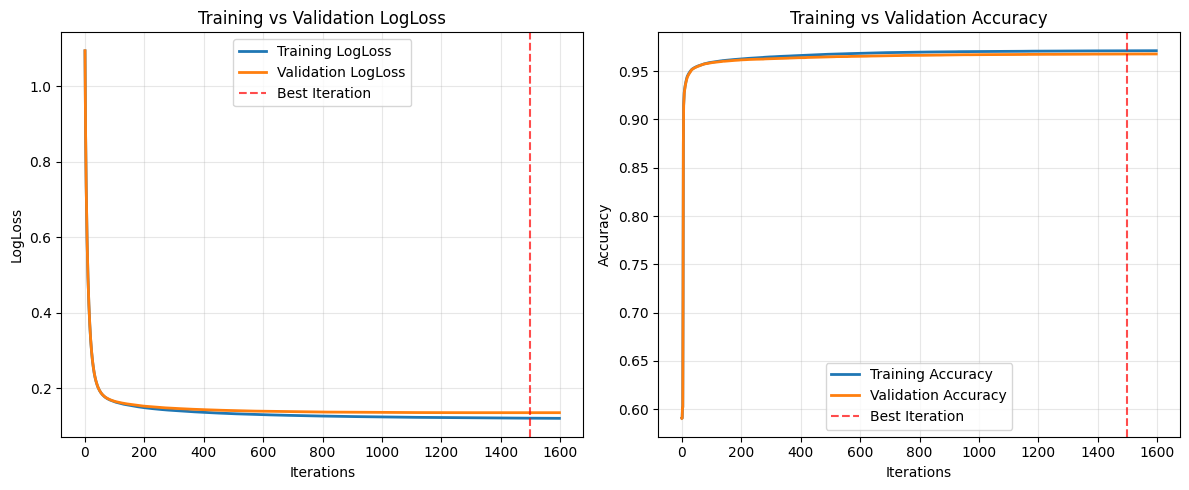


📊 FINAL PERFORMANCE METRICS:
-----------------------------------
• Final Training Accuracy: 0.9710 (97.10%)
• Final Validation Accuracy: 0.9677 (96.77%)
• Accuracy Gap: 0.0034 (0.34%)

🎯 OVERFITTING ASSESSMENT:
------------------------------
🟢 EXCELLENT: Model is well-generalized (no overfitting)
   • Training and validation performance are very close
   • Model generalizes well to unseen data

⭐ MODEL ROBUSTNESS ANALYSIS:
-----------------------------------
• Best iteration: 1498
• Early stopping triggered: False
• Convergence stability: Stable

🎯 PROJECT ANALYSIS COMPLETED SUCCESSFULLY!


In [ ]:
# ============================================================
# === Bloc 8: Model Performance Visualization (Overfitting Check)
# ============================================================

print("=" * 60)
print("📈 MODEL PERFORMANCE VISUALIZATION & OVERFITTING ANALYSIS")
print("=" * 60)

import matplotlib.pyplot as plt
import numpy as np

print(f"\n🔍 OVERFITTING ANALYSIS:")
print("-" * 30)

# Plot LogLoss
print("📊 Plotting Training vs Validation Loss...")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(evals_result["training"]["multi_logloss"], label="Training LogLoss", linewidth=2)
plt.plot(evals_result["valid_1"]["multi_logloss"], label="Validation LogLoss", linewidth=2)
plt.axvline(x=lgbm.best_iteration, color='red', linestyle='--', alpha=0.7, label=f'Best Iteration')
plt.xlabel("Iterations")
plt.ylabel("LogLoss")
plt.title("Training vs Validation LogLoss")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Accuracy (1 - multi_error)
print("📈 Plotting Training vs Validation Accuracy...")
plt.subplot(1, 2, 2)
train_acc = 1 - np.array(evals_result["training"]["multi_error"])
valid_acc = 1 - np.array(evals_result["valid_1"]["multi_error"])
plt.plot(train_acc, label="Training Accuracy", linewidth=2)
plt.plot(valid_acc, label="Validation Accuracy", linewidth=2)
plt.axvline(x=lgbm.best_iteration, color='red', linestyle='--', alpha=0.7, label=f'Best Iteration')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final accuracies analysis
final_train_acc = train_acc[-1]
final_valid_acc = valid_acc[-1]
gap = final_train_acc - final_valid_acc

print(f"\n📊 FINAL PERFORMANCE METRICS:")
print("-" * 35)
print(f"• Final Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"• Final Validation Accuracy: {final_valid_acc:.4f} ({final_valid_acc*100:.2f}%)")
print(f"• Accuracy Gap: {gap:.4f} ({gap*100:.2f}%)")

print(f"\n🎯 OVERFITTING ASSESSMENT:")
print("-" * 30)
if gap < 0.01:
    print("🟢 EXCELLENT: Model is well-generalized (no overfitting)")
    print("   • Training and validation performance are very close")
    print("   • Model generalizes well to unseen data")
elif gap < 0.03:
    print("🟡 GOOD: Slight overfitting, acceptable range")
    print("   • Small performance gap between train/validation")
    print("   • Model shows good generalization")
elif gap < 0.05:
    print("🟠 MODERATE: Noticeable overfitting")
    print("   • Consider regularization or early stopping")
    print("   • Model may benefit from more data")
else:
    print("🔴 HIGH: Significant overfitting detected")
    print("   • Model memorizes training data")
    print("   • Recommend: stronger regularization, more data, or architecture changes")

print(f"\n⭐ MODEL ROBUSTNESS ANALYSIS:")
print("-" * 35)
print(f"• Best iteration: {lgbm.best_iteration}")
print(f"• Early stopping triggered: {lgbm.best_iteration < 1000}")
print(f"• Convergence stability: {'Stable' if gap < 0.03 else 'Needs attention'}")

print("\n" + "=" * 60)
print("🎯 PROJECT ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 60)